<a href="https://colab.research.google.com/github/Henil21/Natural_Language_processing/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to NLP fundamentals in Tensorflow

The main goal of natural language processing (NLP) is to derive information from natural language.

Natural language is a broad term but you can consider it to cover any of the following:

* Text (such as that contained in an email, blog post, book, Tweet)
* Speech (a conversation you have with a doctor, voice commands you give to a smart speaker)


> Text -> turn into numbers -> build a model -> train the model to find patterns -> use patterns (make predictions)


In [1]:
!nvidia-smi  -L

GPU 0: Tesla T4 (UUID: GPU-ad657aef-e30a-3404-b37b-749ae1f4eb24)


## getting helper functions 🐚

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-07-18 08:57:10--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-07-18 08:57:10 (97.7 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
# importing series of helper functions for the notebook
from helper_functions import unzip_data, create_tensorboard_callback,plot_loss_curves,compare_historys

## Get a text dataset

>description of data set: text sample of tweet labelled as disaster or not disaster.

In [4]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
unzip_data('nlp_getting_started.zip')

--2023-07-18 08:57:14--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.193.128, 173.194.194.128, 173.194.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.006s  

2023-07-18 08:57:14 (102 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



## Visualizing Our Data


In [5]:
import pandas as pd
train_dir=pd.read_csv("train.csv")
test_dir=pd.read_csv("test.csv")
train_dir.head()


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
# shuffling the training data
train_shf=train_dir.sample(frac=1,random_state=42)
train_shf.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [7]:
train_dir.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [8]:
# lets visualize some random training example
import random
random_index=random.randint(0, len(train_dir)-5)
# create random index not higher than total number of samples
for row in train_shf[["text","target"]][random_index:random_index+5].itertuples():
  _,text,target=row
  print(f"target:{target}","(real disaster)" if target>0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("----\n")

target:0 (not real disaster)
Text:
THESE AFTER BATTLE ANIMATIONS ARE SO FUCKING MUCH

----

target:1 (real disaster)
Text:
Suicide bomber detonates in Saudi Arabia mosque 17 reportedly killed  http://t.co/xycKgxZv9s

----

target:0 (not real disaster)
Text:
@WoundedPigeon http://t.co/s9soAeVcVo Detonate by @ApolloBrown ft. M.O.P.

----

target:1 (real disaster)
Text:
OMFG there are bush fires all over this tiny island. Our freaking house is gonna burn down.

----

target:0 (not real disaster)
Text:
@sabcnewsroom sabotage!I rule out structural failure

----



### Split data into training and validation sets ✅

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# use train_test_split to split training data into training and validation sets
train_sentences,val_sentences,train_labels,val_labels=train_test_split(train_shf["text"].to_numpy(),
                                                                       train_shf["target"].to_numpy(),
                                                                       test_size=0.1,
                                                                       random_state=42)

In [11]:
val_sentences[:10]
val_labels[:10]

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [12]:
train_sentences[:10]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk',
       '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
       'destroy the free fandom honestly',
       'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
       '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
       'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
      dtype=object)

In [13]:
val_labels.shape

(762,)

### Converting Text into number ⚡




* Tokenization - A straight mapping from word or character or sub-word to a numerical value. There are three main levels of tokenization:
1. Using word-level tokenization with the sentence "I love TensorFlow" might result in "I" being 0, "love" being 1 and "TensorFlow" being 2. In this case, every word in a sequence considered a single token.
2. Character-level tokenization, such as converting the letters A-Z to values 1-26. In this case, every character in a sequence considered a single token.
3. Sub-word tokenization is in between word-level and character-level tokenization. It involves breaking invidual words into smaller parts and then converting those smaller parts into numbers. For example, "my favourite food is pineapple pizza" might become "my, fav, avour, rite, fo, oo, od, is, pin, ine, app, le, piz, za". After doing this, these sub-words would then be mapped to a numerical value. In this case, every word could be considered multiple tokens.
* Embeddings - An embedding is a representation of natural language which can be learned. Representation comes in the form of a feature vector. For example, the word "dance" could be represented by the 5-dimensional vector [-0.8547, 0.4559, -0.3332, 0.9877, 0.1112]. It's important to note here, the size of the feature vector is tuneable. There are two ways to use     embeddings:
1. Create your own embedding - Once your text has been turned into numbers (required for an embedding), you can put them through an embedding layer (such as tf.keras.layers.Embedding) and an embedding representation will be learned during model training.
2. Reuse a pre-learned embedding - Many pre-trained embeddings exist online. These pre-trained embeddings have often been learned on large corpuses of text (such as all of Wikipedia) and thus have a good underlying representation of natural language. You can use a pre-trained embedding to initialize your model and fine-tune it to your own specific task.

### Text vectorization (Tokenization)
* The TextVectorization layer takes the following parameters:

*  max_tokens - The maximum number of words in your vocabulary (e.g. 20000 or the number of unique words in your text), includes a value for OOV (out of vocabulary) tokens.
* standardize - Method for standardizing text. Default is "lower_and_strip_punctuation" which lowers text and removes all punctuation marks.
* split - How to split text, default is "whitespace" which splits on spaces.
* ngrams - How many words to contain per token split, for example, ngrams=2 splits tokens into continuous sequences of 2.
* output_mode - How to output tokens, can be "int" (integer mapping), "binary" (one-hot encoding), "count" or "tf-idf". See documentation for more.
* output_sequence_length - Length of tokenized sequence to output. For example, if output_sequence_length=150, all tokenized sequences will be 150 tokens long.
* pad_to_max_tokens - Defaults to False, if True, the output feature axis will be padded to max_tokens even if the number of unique tokens in the vocabulary is less than max_tokens. Only valid in certain modes, see docs for more.

In [14]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

#using default textvectorization parameters
text_vec=TextVectorization(max_tokens=None, #how many different words are in our vocabaulary (automatically add <ODV>)
                           standardize="lower_and_strip_punctuation",#convert all to lower case and remove punctucations as it doesnot contribute much in output
                           split="whitespace",
                           ngrams=None, #create groupe of n-word,
                           output_mode="int",
                           output_sequence_length=None,#how long we want our sequences to be(how long a tweet can be)
                          #  pad_to_max_tokens=True [not valid if max_token is set to None]
                           )


In [15]:
len(train_sentences[0].split())

7

In [16]:
# find the average number of token(words) in the training tweet
# Find average number of tokens (words) in training Tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [17]:
# Setup text vectorization with custom variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                     split="whitespace",
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [18]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

# create a smple sentence and tokenize it
sample_tweet="There's a flood in my street"
text_vectorizer([sample_tweet])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [19]:
# choose a random sentence from training dataset and tokenizing the,
random_sentence=random.choice(train_sentences)
print(f"original text:\n{random_sentence}\n\n vectorized text",text_vectorizer(random_sentence))

original text:
And the fact that i have a curfew

 vectorized text tf.Tensor(
[   7    2 1211   16    8   24    3  378    0    0    0    0    0    0
    0], shape=(15,), dtype=int64)


In [20]:
# Get the unique words in vocabulary
words_in_voc=text_vectorizer.get_vocabulary()
top_5=words_in_voc[:5]
bottom_5=words_in_voc[-5:]
print(f"number of word in vocab {len(words_in_voc)}\n")
print(f"5 most comman word in  vocab {top_5}\n")
print(f"5 least comman  word in vocab {bottom_5}")


number of word in vocab 10000

5 most comman word in  vocab ['', '[UNK]', 'the', 'a', 'in']

5 least comman  word in vocab ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


### Creating an Embedding Layer

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding

The Parameters we care most about are
* `input_dim` = the size of our vocabulary
* `output_dim` = the size of the output embedding vector, eg:- a value of 100 would mean each token get represented by a vector of 100 long
* `input_length` = The length of the sequences being passed to the embedding layer

In [21]:
from tensorflow.keras import layers
embedding = layers.Embedding(input_dim=max_vocab_length,#set the input shape
                             output_dim=128,
                             input_length=max_length)

In [22]:
# Get random sentence
random_sentence=random.choice(train_sentences)
print(f"orignal text:\n{random_sentence}")

# embed the random sentence (turn it into dense vector of the fixed size)
sample_embed = embedding(text_vectorizer([random_sentence]))



orignal text:
Short of throwing them overboard himself I don't think any other leader could do much worse by #refugees than @TonyAbbottMHR worst pm ever!


In [23]:
#  check out single token embedding
sample_embed[0][0],sample_embed[0][0].shape, random_sentence

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([ 1.1392187e-02, -2.6832605e-02, -8.1206486e-04, -1.2894642e-02,
        -1.9536329e-02, -7.3150508e-03, -4.3640103e-02,  3.6468755e-02,
         4.7487628e-02,  4.9837817e-02, -4.7671508e-02,  1.1947881e-02,
         1.2664620e-02,  1.2909416e-02, -1.3400279e-02,  4.0274490e-02,
        -3.1442810e-02,  2.2103798e-02,  2.6986215e-02,  1.0554932e-02,
         1.4616251e-03, -9.7592101e-03,  4.4259075e-02, -4.5927513e-02,
         8.6170323e-03,  1.3991963e-02,  3.8050082e-02,  4.7723044e-02,
         1.1558734e-02,  2.2001456e-02, -1.5725352e-02, -1.0719787e-02,
         4.8986707e-02, -2.1158552e-02,  3.2585811e-02, -2.6550770e-02,
         4.3673169e-02,  1.6427230e-02, -8.5275248e-04, -8.6206794e-03,
         4.0925059e-02, -2.0851089e-02, -3.1198431e-02,  4.8909076e-03,
        -2.3593081e-02,  3.3322785e-02, -5.0598979e-03,  2.1310184e-02,
         3.1013336e-02,  4.7220971e-02,  4.3303315e-02,  1.1182211e-02,
        -2.1589

### Modelling a text dataset

Once you've got your inputs and outputs prepared, it's a matter of figuring out which machine learning model to build in between them to bridge the gap.

Now that we've got a way to turn our text data into numbers, we can start to build machine learning models to model it.

To get plenty of practice, we're going to build a series of different models, each as its own experiment. We'll then compare the results of each model and see which one performed best.

More specifically, we'll be building the following:

* Model 0: Naive Bayes (baseline)
* Model 1: Feed-forward neural network (dense model)
* Model 2: LSTM model
* Model 3: GRU model
* Model 4: Bidirectional-LSTM model
* Model 5: 1D Convolutional Neural Network
* Model 6: TensorFlow Hub Pretrained Feature Extractor
* Model 7: Same as model 6 with 10% of training data




### Model 0: Getting a baseline
As with all machine learning modelling experiments, it's important to create a baseline model so you've got a benchmark for future experiments to build upon.

To create our baseline, we'll create a Scikit-Learn Pipeline using the TF-IDF (term frequency-inverse document frequency) formula to convert our words to numbers and then model them with the Multinomial Naive Bayes algorithm.

In [24]:
# Convert text into number
from sklearn.feature_extraction.text import TfidfVectorizer
# our model
from sklearn.naive_bayes import MultinomialNB

from sklearn.pipeline import Pipeline

# create tokenization and modelling pipeline
model_0 = Pipeline([
    ("tfidf",TfidfVectorizer()),# convert words to number using tfidf
    ("clf",MultinomialNB())# model the text
])
# fit the pipleine to the training data
model_0.fit(train_sentences,train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [25]:
baseline_score=model_0.score(val_sentences,val_labels)
# as we use .evaluate in tf for sklearn its .score
baseline_score*100

79.26509186351706

In [26]:
baseline_pred=model_0.predict(val_sentences)

baseline_pred[:10]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0])

In [27]:
train_labels[:10]

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1])

### Creating an evaluation function for our model experiments

we could evaluate these as they are but since we're going to be evaluating several models in the same way going forward, let's create a helper function which takes an array of predictions and ground truth labels and computes the following:

* Accuracy
* Precision
* Recall
* F1-score
> 🔑 Note: Since we're dealing with a classification problem, the above metrics are the most appropriate. If we were working with a regression problem, other metrics such as MAE (mean absolute error) would be a better choice.

In [28]:
from sklearn.metrics import accuracy_score,precision_recall_fscore_support
def calculate_results(y_true,y_pred):
  # Calculate model accuracy
  model_accuracy=accuracy_score(y_true,y_pred)*100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                   "precision":model_precision*100,
                   "recall":model_recall*100,
                   "f1":model_f1*100
                   }
  return model_results

In [29]:
bline=calculate_results(y_true=val_labels, y_pred=baseline_pred)
bline

{'accuracy': 79.26509186351706,
 'precision': 81.11390004213173,
 'recall': 79.26509186351706,
 'f1': 78.6218975804955}

### Model 1: A Simple Dense Model 🚀

In [30]:
#  Creating tensorboard callback
from helper_functions import create_tensorboard_callback
SAVE_DIR="model_logs"

In [31]:
from tensorflow.keras import layers
input=layers.Input(shape=(1,),dtype=tf.string) # inputs are 1-dimensional
x=text_vectorizer(input) # convert strings into number
x=embedding(x) # create an embedding of the numberized inputs
x = layers.GlobalAveragePooling1D()(x)
output=layers.Dense(1,activation="sigmoid")(x)
model_1=tf.keras.Model(input,output,name="model_1_dense")

In [32]:
# model_1.summary()
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_1_history = model_1.fit(train_sentences, # input sentences can be a list of strings due to text preprocessing layer built-in model
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20230718-085719
Epoch 1/5
215/215 [==============================] - 33s 133ms/step - loss: 0.6123 - accuracy: 0.6802 - val_loss: 0.5343 - val_accuracy: 0.7625
Epoch 2/5
215/215 [==============================] - 4s 17ms/step - loss: 0.4420 - accuracy: 0.8208 - val_loss: 0.4678 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.3460 - accuracy: 0.8599 - val_loss: 0.4589 - val_accuracy: 0.7940
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2839 - accuracy: 0.8904 - val_loss: 0.4618 - val_accuracy: 0.7887
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.2369 - accuracy: 0.9132 - val_loss: 0.4815 - val_accuracy: 0.7887



> use `GlobalAveragePooling1D` to layer before output layer if our data is 1D

In [33]:
model_1_pred=probs=model_1.predict(val_sentences)
model_1_pred.shape

24/24 [==============================] - 0s 2ms/step


(762, 1)

In [34]:
model_1_pred[:10]

array([[0.34388837],
       [0.83879924],
       [0.9976533 ],
       [0.10034934],
       [0.1091987 ],
       [0.9390032 ],
       [0.92541313],
       [0.9927326 ],
       [0.96423763],
       [0.22087914]], dtype=float32)

In [87]:
model_1_pr=tf.squeeze(tf.round(model_1_pred))
model_1_pred=calculate_results(y_true=val_labels, y_pred=model_1_pr)

In [36]:
words_in_voc = text_vectorizer.get_vocabulary()
len(words_in_voc),words_in_voc[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [37]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [38]:
# #  Get weight matrix of embedding layer
# embed_weight=model_1.get_layer("embedding").get_weights()[0]
# embed_weight

In [39]:
# # should be same size as vocab size and embedding dim
# print(embed_weight.shape)


`projector.tensorflow.org`
[word_embeddings guid](https://www.tensorflow.org/text/guide/word_embeddings)
* lets see how we can visualize embedding matrix token representationbn

In [40]:
#  import io

# # Create output writers
# out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
# out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

# # Write embedding vectors and words to file
# for num, word in enumerate(words_in_voc):
#   if num == 0:
#      continue # skip padding token
#   vec = embed_weight[num]
#   out_m.write(word + "\n") # write words to file
#   out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file
# out_v.close()
# out_m.close()

# # Download files locally to upload to Embedding Projector
# try:
#   from google.colab import files
# except ImportError:
#   pass
# else:
#   files.download("embedding_vectors.tsv")
#   files.download("embedding_metadata.tsv")

## *Recurrent Neural Network (RNN's)⛹*


* RNN's are the useful for sequence data.


* The premise of recurrent neueal network is to use the representation of previous input aid the representation of a later input.🔗


- [MIT Deep Learning Lecture on Recurrent Neural Networks](https://www.youtube.com/watch?v=SEnXr6v2ifU) - explains the background of recurrent neural networks and introduces LSTMs.

- [Understanding LSTMs by Chris Olah](https://colah.github.io/posts/2015-08-Understanding-LSTMs/) - an in-depth (and technical) look at the mechanics of the LSTM cell, possibly the most popular RNN building block.


### Model 2 : LSTM
> LSTM = Long short term memory

* out structure of an RNN typically looks like this ⬇

```
Input (text) -> Tokenize -> embedding -> Layers (RNNs/dense) -> Output (label probability)
```

In [41]:
# LSTM model
import tensorflow as tf
tf.random.set_seed(42)
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,),dtype='string')
x=text_vectorizer(inputs)
x=embedding(x)

# print(x.shape)
x=layers.LSTM(64,return_sequences=True)(x)
# print(x.shape)

# print(x.shape)
x=layers.LSTM(64,return_sequences=True)(x)
x=layers.LSTM(64)(x)


outputs=layers.Dense(64,activation='relu')(x)
outputs=layers.Dense(1,activation='sigmoid')(x)
model_2=tf.keras.Model(input,output,name="model_2_LSTM")

In [42]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
No

In [43]:
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [44]:
history=model_2.fit(train_sentences,
                    train_labels,
                    epochs=10,
                    validation_data=(val_sentences,val_labels),
                     callbacks=[create_tensorboard_callback(SAVE_DIR,'model_2_LSTM')])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20230718-085843
Epoch 1/10
215/215 [==============================] - 12s 50ms/step - loss: 0.2012 - accuracy: 0.9244 - val_loss: 0.5133 - val_accuracy: 0.7861
Epoch 2/10
215/215 [==============================] - 4s 19ms/step - loss: 0.1725 - accuracy: 0.9361 - val_loss: 0.5419 - val_accuracy: 0.7861
Epoch 3/10
215/215 [==============================] - 2s 11ms/step - loss: 0.1486 - accuracy: 0.9461 - val_loss: 0.5736 - val_accuracy: 0.7782
Epoch 4/10
215/215 [==============================] - 2s 8ms/step - loss: 0.1294 - accuracy: 0.9540 - val_loss: 0.6122 - val_accuracy: 0.7861
Epoch 5/10
215/215 [==============================] - 3s 12ms/step - loss: 0.1139 - accuracy: 0.9588 - val_loss: 0.6477 - val_accuracy: 0.7808
Epoch 6/10
215/215 [==============================] - 2s 8ms/step - loss: 0.1026 - accuracy: 0.9632 - val_loss: 0.6854 - val_accuracy: 0.7782
Epoch 7/10
215/215 [==============================] - 2s 9ms/step - lo

In [45]:
model_2_pred_prob=model_2.predict(val_sentences)
model_2_pred_prob[:10]

24/24 [==============================] - 0s 2ms/step


array([[3.9196825e-01],
       [6.6537976e-01],
       [9.9967289e-01],
       [5.2446835e-02],
       [3.1327340e-04],
       [9.9103957e-01],
       [8.1997538e-01],
       [9.9999714e-01],
       [9.9999344e-01],
       [6.2012780e-01]], dtype=float32)

In [46]:
model_2_preds=tf.squeeze(tf.round(model_2_pred_prob))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [47]:
val_labels[:10]

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [48]:
model_2_result=calculate_results(y_true=val_labels,
                                 y_pred=model_2_preds)
model_2_result

{'accuracy': 77.03412073490814,
 'precision': 77.20778836459698,
 'recall': 77.03412073490814,
 'f1': 76.81933440908485}

### Lets Try GRU 🌃
```
GRU is similar as LSTM but with less parameters
```


In [49]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_3_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_3")

# Build an RNN using the GRU cell
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_3_embedding(x)
# x = layers.GRU(64, return_sequences=True) # stacking recurrent cells requires return_sequences=True
x = layers.GRU(64)(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer after GRU cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [50]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [51]:
# Compile GRU model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "GRU")])

Saving TensorBoard log files to: model_logs/GRU/20230718-085915
Epoch 1/5
215/215 [==============================] - 15s 52ms/step - loss: 0.5288 - accuracy: 0.7222 - val_loss: 0.4562 - val_accuracy: 0.7730
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3193 - accuracy: 0.8683 - val_loss: 0.4905 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.2185 - accuracy: 0.9175 - val_loss: 0.5551 - val_accuracy: 0.7730
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1565 - accuracy: 0.9457 - val_loss: 0.6164 - val_accuracy: 0.7848
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1196 - accuracy: 0.9593 - val_loss: 0.6028 - val_accuracy: 0.7664


In [52]:
# Make predictions on the validation data
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs.shape, model_3_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


((762, 1),
 array([[0.31529015],
        [0.9084305 ],
        [0.9969279 ],
        [0.16040888],
        [0.01238291],
        [0.99022967],
        [0.7739546 ],
        [0.9973013 ],
        [0.9959857 ],
        [0.28023884]], dtype=float32))

In [53]:
# Convert prediction probabilities to prediction classes
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [54]:
# Calcuate model_3 results
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 76.64041994750657,
 'precision': 76.62606650453277,
 'recall': 76.64041994750657,
 'f1': 76.54276516145048}

### Tensorflow Bi-direction LSTM(RNN) ✨
Look at us go! We've already built two RNN's with GRU and LSTM cells. Now we're going to look into another kind of RNN, the bidirectional RNN.

A standard RNN will process a sequence from left to right, where as a bidirectional RNN will process the sequence from left to right and then again from right to left.

Intuitively, this can be thought of as if you were reading a sentence for the first time in the normal fashion (left to right) but for some reason it didn't make sense so you traverse back through the words and go back over them again (right to left).

In practice, many sequence models often see and improvement in performance when using bidirectional RNN's.

However, this improvement in performance often comes at the cost of longer training times and increased model parameters (since the model goes left to right and right to left, the number of trainable parameters doubles).

Okay enough talk, let's build a bidirectional RNN.

Once again, TensorFlow helps us out by providing the tensorflow.keras.layers.Bidirectional class. We can use the Bidirectional class to wrap our existing RNNs, instantly making them bidirectional

In [55]:
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,),dtype="string")
x=text_vectorizer(inputs)
x=embedding(x)
# x=layers.Bidirectional(layers.LSTM(64,return_sequences=True))(x) #layers.Bidirectional works with any LSTM
# print(x.shape)
x=layers.Bidirectional(layers.GRU(64))(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_4=tf.keras.Model(inputs,outputs,name="model_4_bidirectional")


In [56]:
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              74496     
 l)                                                              
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,354,625
Trainable params: 1,3

In [57]:
# Compile model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [58]:
# Fit the model
model_4_history=model_4.fit(train_sentences,
                            train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(SAVE_DIR, "model_4_bidirectional")])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20230718-085959
Epoch 1/5
215/215 [==============================] - 16s 56ms/step - loss: 0.1110 - accuracy: 0.9672 - val_loss: 0.9213 - val_accuracy: 0.7717
Epoch 2/5
215/215 [==============================] - 4s 17ms/step - loss: 0.0691 - accuracy: 0.9724 - val_loss: 0.8361 - val_accuracy: 0.7677
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.0614 - accuracy: 0.9746 - val_loss: 0.9129 - val_accuracy: 0.7612
Epoch 4/5
215/215 [==============================] - 2s 12ms/step - loss: 0.0603 - accuracy: 0.9769 - val_loss: 0.9134 - val_accuracy: 0.7572
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0544 - accuracy: 0.9764 - val_loss: 1.0466 - val_accuracy: 0.7612


In [59]:
# convert pred probs to pred lables
model_4_pred_probs=model_4.predict(val_sentences)
# model_4_pred_probs[:10]
model_preds=tf.squeeze(tf.round(model_4_pred_probs))
model_preds[:10]

24/24 [==============================] - 1s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [60]:
model_4_results=calculate_results(y_true=val_labels,
                                  y_pred=model_preds)
model_4_results

{'accuracy': 76.11548556430446,
 'precision': 76.10421046068336,
 'recall': 76.11548556430446,
 'f1': 76.00554649035874}

### Conv1D 🐛

In [61]:
embedding_test=embedding(text_vectorizer(['this is a test sentence']))
conv_1d=layers.Conv1D(filters=32,
                      kernel_size=5,
                      activation='relu',
                      padding='valid')
conv_1d_output=conv_1d(embedding_test)
max_pool=layers.GlobalMaxPool1D()
max_pool_output=max_pool(conv_1d_output)

In [62]:
# getting shape
embedding_test.shape,conv_1d_output.shape,max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [63]:
# Create 1-D convolutional layer to model sequences

In [64]:
from tensorflow.keras.optimizers import RMSprop
input=layers.Input(shape=(1,),dtype=tf.string)
x=text_vectorizer(inputs)
x=embedding(x)
x=layers.Conv1D(filters=64,kernel_size=5,activation='relu',padding='valid')(x)
x=layers.GlobalMaxPool1D()(x)
outputs=layers.Dense(1,activation='sigmoid')(x)
model_5=tf.keras.Model(inputs,outputs,name="model_5_conv_1D")

model_5.compile(loss="binary_crossentropy",
                            optimizer=tf.keras.optimizers.Adam(),
                             metrics=["accuracy"])

model_5.summary()

Model: "model_5_conv_1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_5 (Dense)             (None, 1)             

In [65]:
model_5_history=model_5.fit(train_sentences,
                            train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(SAVE_DIR, "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20230718-090047
Epoch 1/5
215/215 [==============================] - 14s 51ms/step - loss: 0.1041 - accuracy: 0.9682 - val_loss: 0.9618 - val_accuracy: 0.7651
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0667 - accuracy: 0.9746 - val_loss: 1.1163 - val_accuracy: 0.7572
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0581 - accuracy: 0.9755 - val_loss: 1.1718 - val_accuracy: 0.7585
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0534 - accuracy: 0.9774 - val_loss: 1.2468 - val_accuracy: 0.7533
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0491 - accuracy: 0.9784 - val_loss: 1.3022 - val_accuracy: 0.7612


In [66]:
model_5_pred_pro=model_5.predict(val_sentences)
model_5_pred_pro[:10]

24/24 [==============================] - 0s 2ms/step


array([[2.9945290e-01],
       [6.5122885e-01],
       [9.9987805e-01],
       [6.4779006e-02],
       [5.0671264e-07],
       [9.9150437e-01],
       [9.8821610e-01],
       [9.9995947e-01],
       [1.0000000e+00],
       [9.6463025e-01]], dtype=float32)

In [67]:
model_5_preds=tf.squeeze(tf.round(model_5_pred_pro))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [68]:
# evaluate model_5 prediction
model_5_results=calculate_results(y_true=val_labels,
                                                        y_pred=model_5_preds)
model_5_results

{'accuracy': 76.11548556430446,
 'precision': 76.20839190766789,
 'recall': 76.11548556430446,
 'f1': 75.92507437677536}

### pre-trained sentence encoder ✈

For all of the previous deep learning models we've built and trained, we've created and used our own embeddings from scratch each time.

However, a common practice is to leverage pretrained embeddings through transfer learning. This is one of the main benefits of using deep models: being able to take what one (often larger) model has learned (often on a large amount of data) and adjust it for our own use case.

For our next model, instead of using our own embedding layer, we're going to replace it with a pretrained embedding layer.

More specifically, we're going to be using the Universal Sentence Encoder from TensorFlow Hub (a great resource containing a plethora of pretrained model resources for a variety of tasks).

> 🔑 Note: There are many different pretrained text embedding options on TensorFlow Hub, however, some require different levels of text preprocessing than others. Best to experiment with a few and see which best suits your use case.

In [69]:
# Create sample sentence and tokenize it
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

The feature extractor model we're building through the eyes of an encoder/decoder* model.*

>🔑 Note: An encoder is the name for a model which converts raw data such as text into a numerical representation (feature vector), a decoder converts the numerical representation to a desired output.

As usual, this is best demonstrated with an example.

We can load in a TensorFlow Hub module using the hub.load() method and passing it the target URL of the module we'd like to use, in our case, it's "https://tfhub.dev/google/universal-sentence-encoder/4".

Let's load the Universal Sentence Encoder model and test it on a couple of sentences

In [70]:
import tensorflow_hub as hub
embed=hub.load('https://tfhub.dev/google/universal-sentence-encoder/4')
embed_sample=embed([sample_sentence,
                    "When you call the universal sentence encoder on a sentence, it turns it into numbers."])


embed_sample

<tf.Tensor: shape=(2, 512), dtype=float32, numpy=
array([[-0.01157028,  0.0248591 ,  0.02878048, ..., -0.00186124,
         0.02315826, -0.01485021],
       [ 0.03596687, -0.08579469, -0.01152738, ..., -0.03414334,
         0.0281602 , -0.00878943]], dtype=float32)>

In [71]:
sentence_encoder_layer=hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                                                    input_shape=(),
                                                                    dtype=tf.string,
                                                                    trainable=False,
                                                                    name="USE"
                                                                    )

In [72]:
model_6=tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64,activation='relu'),

    layers.Dense(1,activation='sigmoid')
],name='model_6_USE')
model_6.compile(loss='binary_crossentropy',
                            optimizer=tf.keras.optimizers.Adam(),
                            metrics=['accuracy']
                                )
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_6 (Dense)             (None, 64)                32832     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [73]:
model_6_history=model_6.fit(train_sentences,
                            train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                   'tf_hub_sentence_encoder')])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20230718-090159
Epoch 1/5
215/215 [==============================] - 7s 20ms/step - loss: 0.4993 - accuracy: 0.7927 - val_loss: 0.4494 - val_accuracy: 0.7966
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.4143 - accuracy: 0.8148 - val_loss: 0.4384 - val_accuracy: 0.8123
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.3997 - accuracy: 0.8209 - val_loss: 0.4340 - val_accuracy: 0.8110
Epoch 4/5
215/215 [==============================] - 4s 19ms/step - loss: 0.3922 - accuracy: 0.8262 - val_loss: 0.4296 - val_accuracy: 0.8150
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.3859 - accuracy: 0.8298 - val_loss: 0.4313 - val_accuracy: 0.8150


In [74]:
# Make predictions with USE TF Hub model
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 1s 10ms/step


array([[0.14958659],
       [0.74267226],
       [0.9862873 ],
       [0.19810309],
       [0.71799666],
       [0.6778978 ],
       [0.97987807],
       [0.97618014],
       [0.9313179 ],
       [0.08694885]], dtype=float32)

In [75]:
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [76]:
# Calculate model 6 performance metrics
model_6_results = calculate_results(val_labels, model_6_preds)
model_6_results

{'accuracy': 81.49606299212599,
 'precision': 81.75707797736699,
 'recall': 81.49606299212599,
 'f1': 81.33343159175271}

### model_7 with10% data

In [77]:
model_7=tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64,activation='relu'),

    layers.Dense(1,activation='sigmoid')
],name='model_7_USE')
model_7.compile(loss='binary_crossentropy',
                            optimizer=tf.keras.optimizers.Adam(),
                            metrics=['accuracy']
                                )
model_7.summary()

Model: "model_7_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_8 (Dense)             (None, 64)                32832     
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [78]:
### NOTE: Making splits like this will lead to data leakage ###
### (some of the training examples in the validation set) ###

### WRONG WAY TO MAKE SPLITS (train_df_shuffled has already been split) ###


# # Create subsets of 10% of the training data
# train_10_percent = train_shf[["text", "target"]].sample(frac=0.1, random_state=42)
# train_sentences_10_percent = train_10_percent["text"].to_list()
# train_labels_10_percent = train_10_percent["target"].to_list()
# len(train_sentences_10_percent), len(train_labels_10_percent)

In [79]:
import numpy as np
train_10_percent_split=int(0.1*len(train_sentences))
train_sentences_10_percent=train_sentences[:train_10_percent_split]
train_labels_10_percent=train_labels[:train_10_percent_split]

pd.Series(np.array(train_labels_10_percent)).value_counts()

0    406
1    279
dtype: int64

In [80]:
model_7_history = model_7.fit(x=train_sentences_10_percent,
                              y=train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "10_percent_tf_hub_sentence_encoder_correct_data")])

Saving TensorBoard log files to: model_logs/10_percent_tf_hub_sentence_encoder_correct_data/20230718-090220
Epoch 1/5
22/22 [==============================] - 3s 47ms/step - loss: 0.6639 - accuracy: 0.6526 - val_loss: 0.6493 - val_accuracy: 0.6654
Epoch 2/5
22/22 [==============================] - 1s 26ms/step - loss: 0.5947 - accuracy: 0.7912 - val_loss: 0.5958 - val_accuracy: 0.7454
Epoch 3/5
22/22 [==============================] - 1s 28ms/step - loss: 0.5209 - accuracy: 0.8204 - val_loss: 0.5423 - val_accuracy: 0.7808
Epoch 4/5
22/22 [==============================] - 1s 28ms/step - loss: 0.4613 - accuracy: 0.8292 - val_loss: 0.5112 - val_accuracy: 0.7782
Epoch 5/5
22/22 [==============================] - 1s 28ms/step - loss: 0.4200 - accuracy: 0.8321 - val_loss: 0.4947 - val_accuracy: 0.7808


In [81]:
# Make predictions with the model trained on 10% of the data
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 [==============================] - 1s 13ms/step


array([[0.19400664],
       [0.60997653],
       [0.89025545],
       [0.35369116],
       [0.5437019 ],
       [0.6892468 ],
       [0.8752881 ],
       [0.7813787 ],
       [0.83736444],
       [0.13925467]], dtype=float32)

In [82]:
# Convert prediction probabilities to labels
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [84]:
# Calculate model results
model_7_results = calculate_results(val_labels, model_7_preds)
model_7_results

{'accuracy': 78.08398950131233,
 'precision': 78.23342077218285,
 'recall': 78.08398950131233,
 'f1': 77.9033864360508}

### comparing the performance of our models ⏲

In [110]:
#  combine model results into a Dataframe
all_model_result=pd.DataFrame({"0_baselin":bline,
                                                    "1_simple_dense":model_1_pred,
                                                      "2_lstm":model_2_result,
                                                    "model_3_gru":model_3_results,
                                                    "4_bidirectional": model_4_results,
                                                    "5_conv_1D":model_5_results,
                                                    "6_tf_hub_USE_Encoder":model_6_results,
                                                    "7_tf_hub_use_en_10_per":model_7_results
                                                                  })

all_model_results=all_model_result.transpose()

In [111]:
all_model_results["accuracy"]=all_model_results["accuracy"]

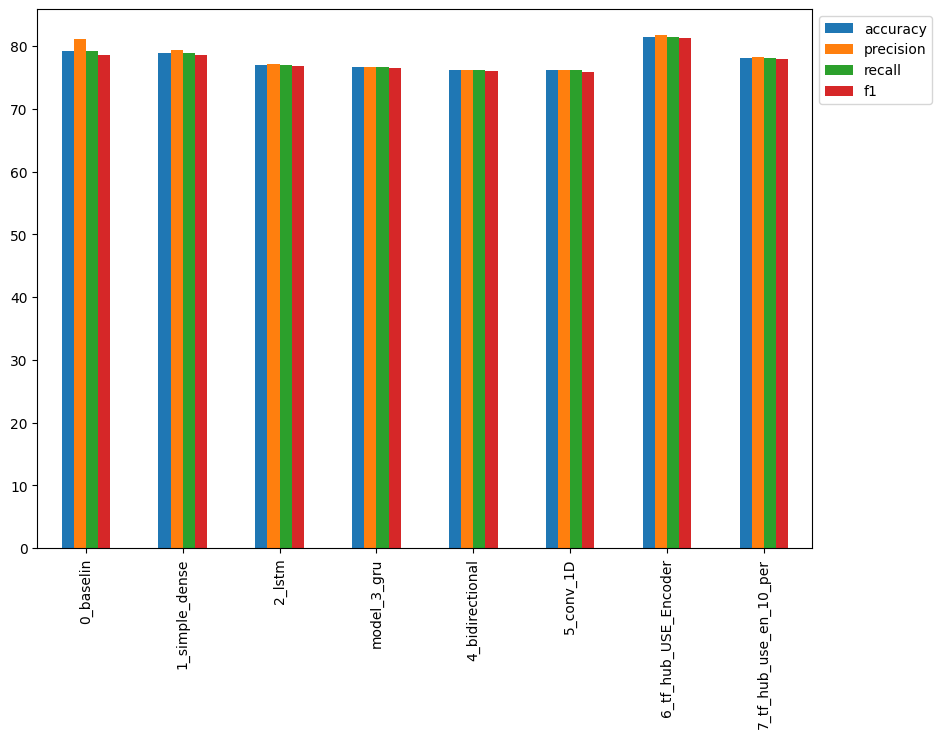

In [112]:
# plot and compare results
all_model_results.plot(kind='bar',figsize=(10,7)).legend(bbox_to_anchor=(1.0,1.0 ))